In [1]:
from hyperparameters import STD_MODEL_FOLDER
import json
import os

ModuleNotFoundError: No module named 'hyperparameters'

> run `wandb login` in terminal before running this notebook

### Delete model

In [8]:
# Delete folder from model_development/models
# Delete entry from trained_models.json

def delete_model(model_name):
  model_path = f"{STD_MODEL_FOLDER}/{model_name}"
  assert os.path.exists(model_path), f"Model {model_name} does not exist."
  os.system(f"rm -rf {model_path}")
  with open("./assets/trained_models.json", "r+") as file:
    trained_models = json.load(file)
    if model_name in trained_models:
      del trained_models[model_name]
      file.seek(0)
      json.dump(trained_models, file, indent=4)
      file.truncate()

delete_model("test_yolo_mAP_test3")

AssertionError: Model test_yolo_mAP_test3 does not exist.

## Visualise Dataset

In [1]:
from data.dataset import CustomDataset
from data.yolo_dataset import YoloDataset

#### Full Dataset

In [18]:
training_data = {
            "dataset_name": "p2v3_train",
            "datasets": {
                "gfp_bahamas1": 1,
                "gfp_belize1": 1,
                "gfp_cook1": 1,
                "gfp_fiji1": 1,
                "gfp_kiribati1": 1,
                "gfp_montserrat1": 1,
                "gfp_png1": 1,
                "gfp_rand10": 1,
                "gfp_rand3": 1,
                "gfp_rand6": 1,
                "gfp_rand9": 1,
                "gfp_tiger1": 1,
                "gfp_bahamas2": 1,
                "gfp_caicos1": 1,
                "gfp_cuba1": 1,
                "gfp_hawaii1": 1,
                "gfp_madagascar1": 1,
                "gfp_mozambique1": 1,
                "gfp_nwa2": 1,
                "gfp_polynesia1": 1,
                "gfp_rand11": 1,
                "gfp_rand4": 1,
                "gfp_rand7": 1,
                "gfp_samoa1": 1,
                "gfp_tobago1": 1,
                "sp_palau5": 1,
                "gfp_barbados1": 1,
                "gfp_caledonia1": 1,
                "gfp_ferdinand1": 1,
                "gfp_jamaica1": 1,
                "gfp_maldives1": 1,
                "gfp_niue1": 1,
                "gfp_palau1": 1,
                "gfp_rand1": 1,
                "gfp_rand2": 1,
                "gfp_rand5": 1,
                "gfp_rand8": 1,
                "gfp_solomon1": 1,
                "gfp_tonga1": 1,
                "shlife_grey2": 1,
                "shlife_grey1": 1,

                "sp_palau": 0,
                "sp_palau4": 0,
                "shlife_scalloped4": 0,
                "shlife_scalloped5": 0,
                "gfp_nwa1": 0,
                "shlife_bull1": 0,
                "shlife_bull4": 0,
                "shlife_bull7": 0,
                "shlife_scalloped1": 0,
                "shlife_smooth1": 0,
                "shlife_bull2": 0,
                "shlife_bull5": 0,
                "shlife_scalloped2": 0,
                "shlife_smooth2": 0,
                "shlife_bull6": 0,
                "shlife_scalloped3": 0,
                "shlife_silvertip1": 0,
                "shlife_smooth3": 0,
                "sp_palau3": 0,
                "shlife_bull3": 0,
                "sp_palau2": 0,
                "val1_difficult2": 0,
                "val1_medium1": 0,
                "val1_easy1": 0,
                "val1_medium2": 0,
                "val1_difficult1": 0,
                "val1_easy2": 0,
            },
            "augmentations": [
            #   "Equalise", "Rotate", "Crop", "Cutout"
              ]
        }
data_dir = "/vol/biomedic3/bglocker/ugproj2324/fv220/datasets/phase2/"
dataset = YoloDataset(training_data["dataset_name"], data_dir, training_data["datasets"], training_data["augmentations"], img_size=640)
len(dataset)

5521

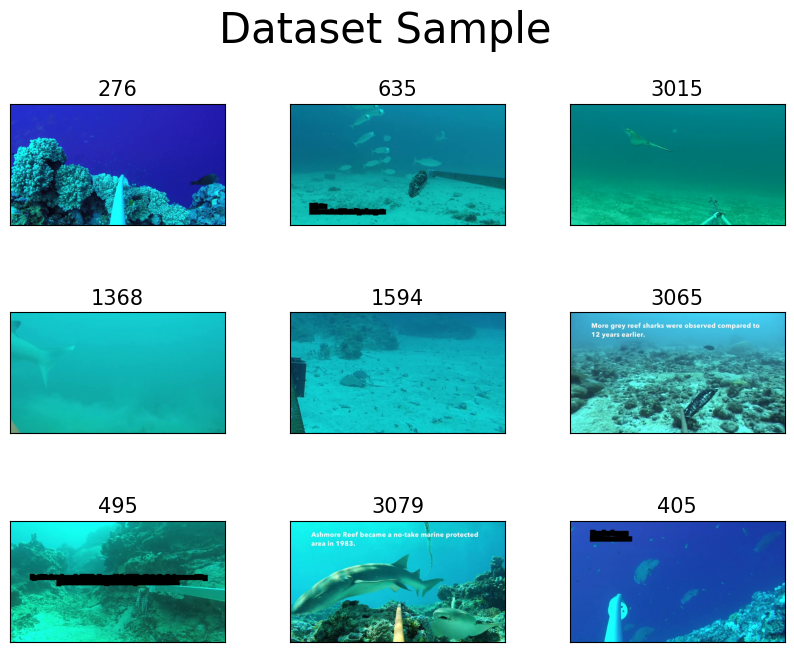

In [19]:
dataset.get_info()

In [20]:
dataset.build()

Building dataset p2v3_train in /vol/biomedic3/bglocker/ugproj2324/fv220/datasets/experimentation_datasets/p2v3_train by copying 5521 images...
Creating subfolder "train" of size 5521 ... (if >10% background, the size will be smaller)
Creating subfolder "val" of size 0 ... (if >10% background, the size will be smaller)
Creating subfolder "test" of size 0 ... (if >10% background, the size will be smaller)


'/vol/biomedic3/bglocker/ugproj2324/fv220/datasets/experimentation_datasets/p2v3_train'

In [ ]:
import matplotlib.pyplot as plt
from data.image_processor import ImageProcessor
import cv2
dataset.plot_single_image(10)
anno = dataset[10]
image = anno["image"]
bboxes = anno["bboxes"]
img = ImageProcessor.draw_rect(image, bboxes, show=True)

gfp_polynesia1_frame5910.jpg


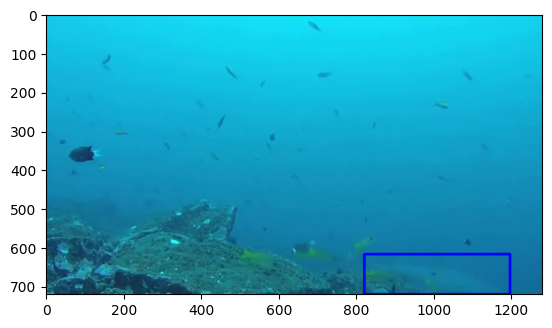

In [7]:
dataset.plot_single_image(2960)